### Predictive Modelling

### Importing Libraries



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing the dataset

In [0]:
#reading the csv file
data = pd.read_csv('Data_MFR_310.csv')

In [0]:
#making a copy of the dataset
df = data.copy()

In [8]:
#first 5 values of the dataset
df.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


#### Renaming the columns

#### Looking at the data, one thing that stands out most is the fact that it is hard to interpert the meaning of column names. Let's begin by changing that first.

In [0]:
df = df.rename(columns = {'513FC31103.pv':'Propylene_flow',
                           '513HC31114-5.mv' : 'Hydrogen_ratio',
                           '513PC31201.pv':	'Pressure_controller',
                           '513LC31202.pv':	'Level_controller',
                          '513FC31409.pv':	'Liquefied_Recycle_gas',
                            '513FC31114-5.pv': 	'Hydrogen_Flow',
                           '513TC31220.pv':	'Temperature_controller' 
                           })

In [0]:
df.head(2)

,Unnamed: 0,Propylene_flow,Hydrogen_ratio,Pressure_controller,Level_controller,Liquefied_Recycle_gas,Hydrogen_Flow,Temperature_controller,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2


In [0]:
#Check the shape of the dataset
df.shape

(2564, 9)

In [0]:
#Let's look at the statistical properties of the dataset
df.describe()

,Propylene_flow,Hydrogen_ratio,Pressure_controller,Level_controller,Liquefied_Recycle_gas,Hydrogen_Flow,Temperature_controller,MFR
count,2486.000000,2560.000000,2484.000000,2484.000000,2484.00000,2486.000000,2484.000000,2564.000000
mean,25306.285729,0.178427,30.663706,77.651055,42525.14000,0.138530,80.144365,8.185218
std,1706.481672,0.077473,0.423345,0.919600,11331.86896,0.041869,0.823554,5.088696
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.632000,0.136000,30.446129,76.992151,34795.53500,0.113764,79.677458,3.700000
50%,25365.754500,0.173500,30.622631,77.494477,41550.56250,0.132986,80.044308,4.300000
75%,26398.452250,0.200000,30.925738,78.210867,50010.29500,0.156990,80.496296,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2564 non-null   object 
 1   Propylene_flow          2486 non-null   float64
 2   Hydrogen_ratio          2560 non-null   float64
 3   Pressure_controller     2484 non-null   float64
 4   Level_controller        2484 non-null   float64
 5   Liquefied_Recycle_gas   2484 non-null   float64
 6   Hydrogen_Flow           2486 non-null   float64
 7   Temperature_controller  2484 non-null   float64
 8   MFR                     2564 non-null   float64
dtypes: float64(8), object(1)
memory usage: 180.4+ KB


#### There are 2564 rows in total in the dataset but looking at the info and description of the dataset, it shows that for some of the features few values are missing. Let's go ahead and preprocess the data.

### Data Preprocessing

In general, data preprocessing needs to be done before feeding the data to our model. The basic steps we follow are:
1. Handling the missing values
2. Handling the categorical variable
3. Feature Scaling


Let's begin by trying to handle the missing values





### Missing Values

In [0]:
#Look at the null values in individual columns
df.isnull().sum()

Unnamed: 0                 0
Propylene_flow            78
Hydrogen_ratio             4
Pressure_controller       80
Level_controller          80
Liquefied_Recycle_gas     80
Hydrogen_Flow             78
Temperature_controller    80
MFR                        0
dtype: int64

In [0]:
# dropping the rows with null values
df = df.dropna(axis=0)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2559
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2484 non-null   object 
 1   Propylene_flow          2484 non-null   float64
 2   Hydrogen_ratio          2484 non-null   float64
 3   Pressure_controller     2484 non-null   float64
 4   Level_controller        2484 non-null   float64
 5   Liquefied_Recycle_gas   2484 non-null   float64
 6   Hydrogen_Flow           2484 non-null   float64
 7   Temperature_controller  2484 non-null   float64
 8   MFR                     2484 non-null   float64
dtypes: float64(8), object(1)
memory usage: 194.1+ KB


Here, we dropped the rows with null values from our dataset.

Since there are no categorical variables in oir dataset we can skip that part of preprocessing.


### **Correlation**

We can check the correlation among the columns to make sure there aren't any features which are highly coorelated as that can affect our model.

In [0]:
cor = df.corr()
cor

,Propylene_flow,Hydrogen_ratio,Pressure_controller,Level_controller,Liquefied_Recycle_gas,Hydrogen_Flow,Temperature_controller,MFR
Propylene_flow,1.000000,-0.035833,-0.246382,0.207590,0.387429,0.279968,-0.157591,-0.247984
Hydrogen_ratio,-0.035833,1.000000,0.221576,0.104436,0.375745,0.226919,0.052967,0.426433
Pressure_controller,-0.246382,0.221576,1.000000,0.044294,0.064547,-0.152372,-0.036286,0.438837
Level_controller,0.207590,0.104436,0.044294,1.000000,0.289986,0.000157,-0.084688,-0.006452
Liquefied_Recycle_gas,0.387429,0.375745,0.064547,0.289986,1.000000,0.246106,0.116090,0.233219
Hydrogen_Flow,0.279968,0.226919,-0.152372,0.000157,0.246106,1.000000,0.103214,-0.209013
Temperature_controller,-0.157591,0.052967,-0.036286,-0.084688,0.116090,0.103214,1.000000,0.125628
MFR,-0.247984,0.426433,0.438837,-0.006452,0.233219,-0.209013,0.125628,1.000000


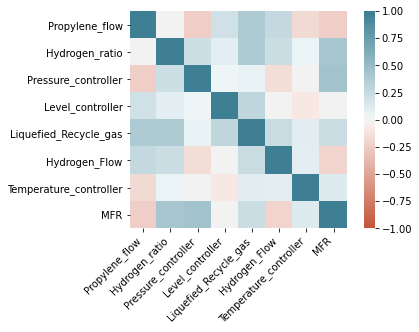

In [0]:
#Visualizing the matrix
ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above correlation matrix it is quite evident that none of the columns have string correlation between them hence eliminaitng the need of removing them on the basis of correlation. 

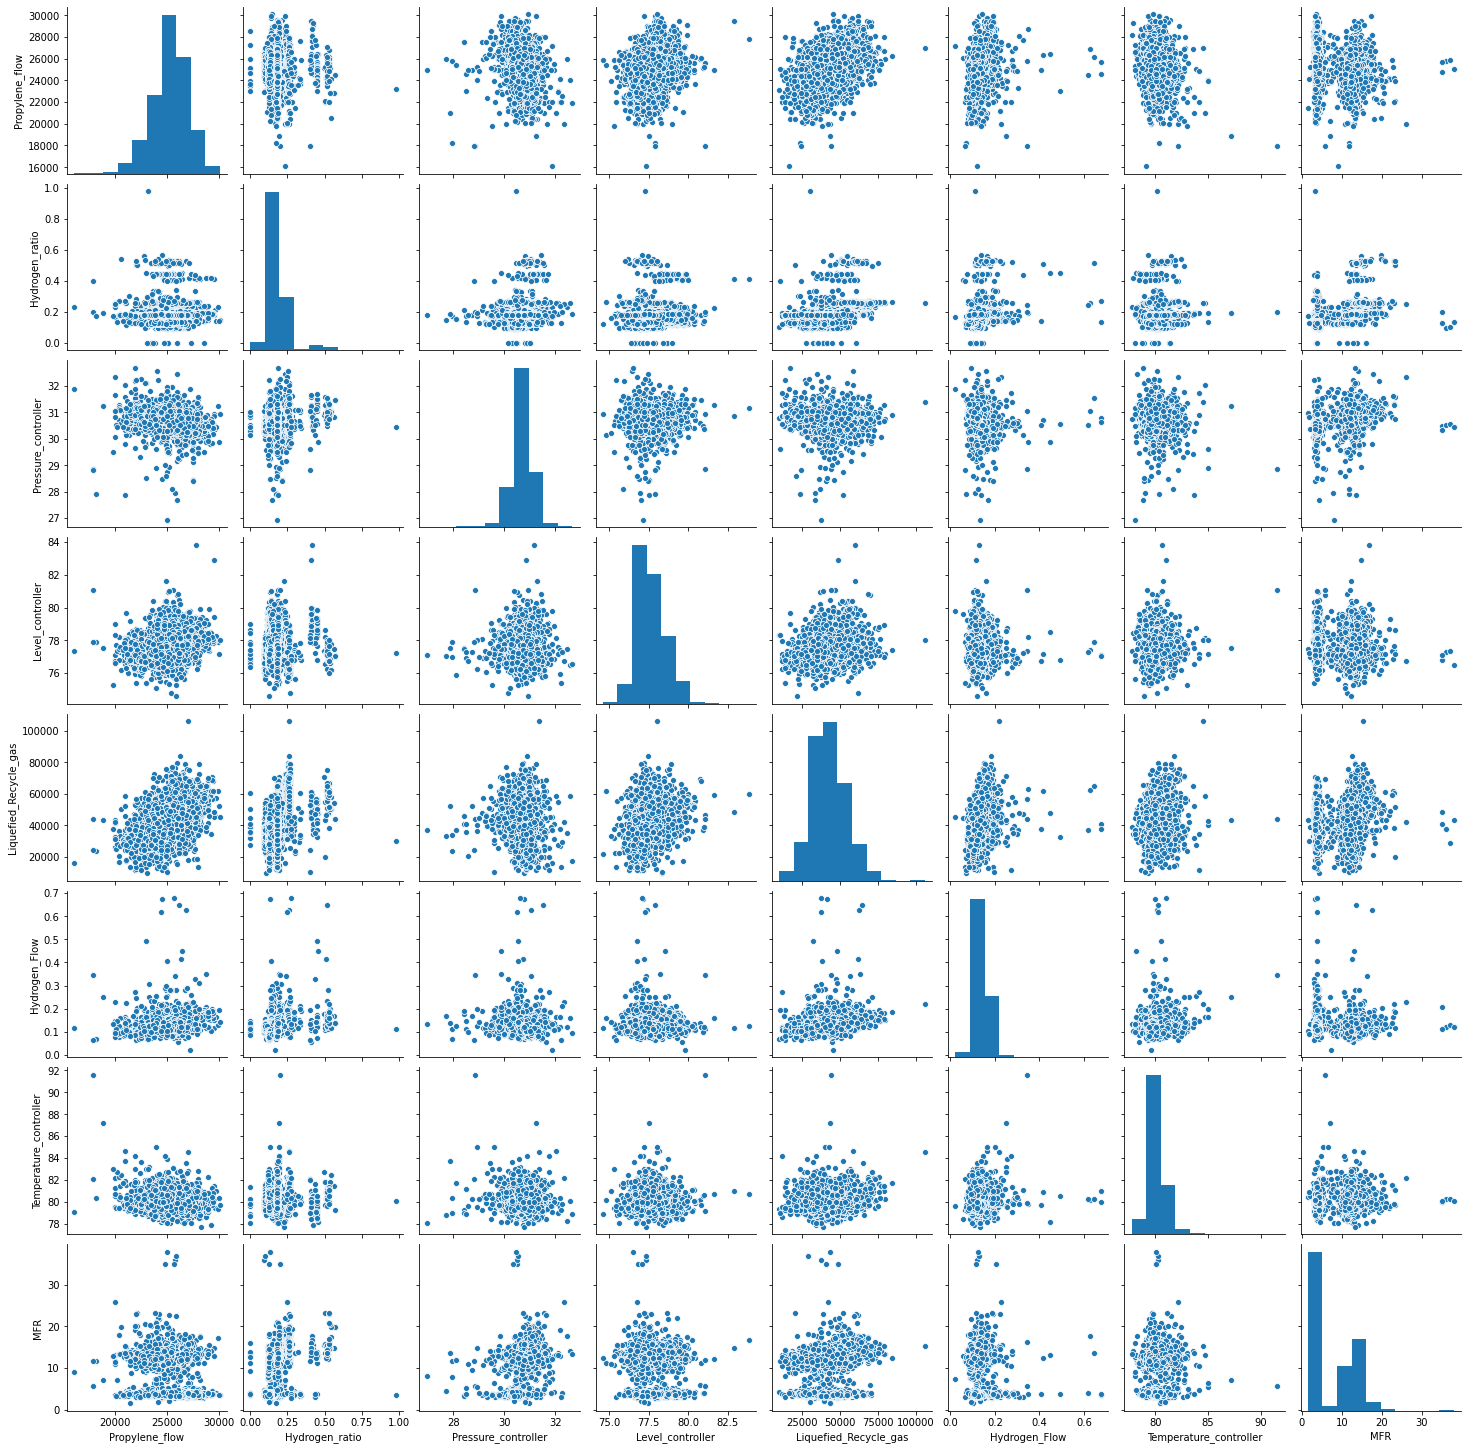

In [0]:
# We can visualize our dataset using a pairplot
g = sns.pairplot(df)
plt.show()

(2484, 9)

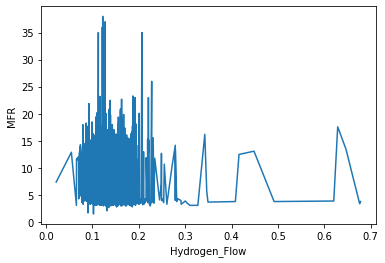

In [0]:
#Univariate analysis
sns.lineplot(x='Hydrogen_Flow', y="MFR", data = df)
df.shape

In [0]:
print("Enteries with hydrogen_flow less than 0.3\n",df[df['Hydrogen_Flow']<0.3]['MFR'])
print("Enteries with hydrogen_flow more than 0.3\n",df[df['Hydrogen_Flow']>0.3]['MFR'])

Enteries with hydrogen_flow less than 0.3
 0        3.4
1        3.2
2        3.2
3        3.1
4        3.3
        ... 
2555    11.8
2556    11.2
2557    11.4
2558    13.5
2559    12.3
Name: MFR, Length: 2468, dtype: float64
Enteries with hydrogen_flow more than 0.3
 416     13.1
797      3.7
1021    16.2
1062    12.5
1180    17.6
1191    13.5
1536     5.7
1562     3.5
1592     3.8
1593     3.1
1595     3.1
1638     3.8
1653     3.4
1699     3.9
1711     3.9
1784     3.8
Name: MFR, dtype: float64


In [0]:
df.iloc[1021]

Unnamed: 0                7/27/2018 3:45
Propylene_flow                   24941.2
Hydrogen_ratio                     0.257
Pressure_controller              31.1344
Level_controller                 78.1813
Liquefied_Recycle_gas            60750.2
Hydrogen_Flow                   0.141379
Temperature_controller           82.3413
MFR                                 13.9
Name: 1031, dtype: object

In [0]:
df.iloc[1536]

Unnamed: 0                09-07-2018 07:45
Propylene_flow                     22683.8
Hydrogen_ratio                       0.193
Pressure_controller                30.6445
Level_controller                   77.6698
Liquefied_Recycle_gas              23487.5
Hydrogen_Flow                     0.152365
Temperature_controller             80.0683
MFR                                    4.4
Name: 1546, dtype: object

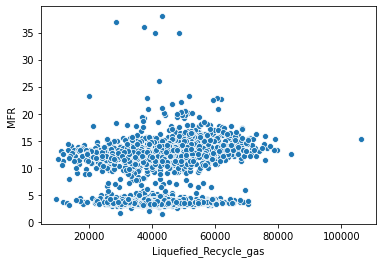

In [0]:
sns.scatterplot('Liquefied_Recycle_gas','MFR',data = df)

In [0]:
df[df['Liquefied_Recycle_gas']>50000]['MFR'].value_counts()

3.6     31
3.8     30
3.7     29
3.9     19
3.5     19
        ..
22.5     1
11.1     1
20.5     1
23.0     1
6.9      1
Name: MFR, Length: 121, dtype: int64

In [0]:
df[df['Liquefied_Recycle_gas']<50000]['MFR'].value_counts()

3.6     150
3.7     135
3.8     126
3.9     111
3.5     107
       ... 
20.1      1
8.5       1
38.0      1
1.5       1
7.0       1
Name: MFR, Length: 156, dtype: int64

Another thing that can  be dully noted from above is that, whenever the value of'Liquefied_Recycle_gas' is less than 50000 most of the datapoints lie in the MFR range of 3.

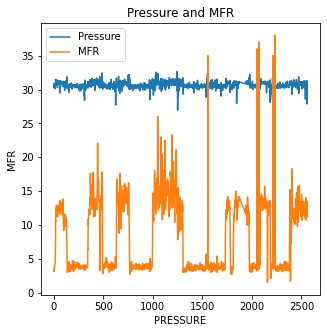

In [31]:
#Let us try and plot two or more variables together to get any hints of relationship between them 
plt.figure(figsize=(5,5))

plt.title('Pressure and MFR')
plt.plot( df['Pressure_controller'], label='Pressure')
plt.plot( df['MFR'], label='MFR')
plt.xlabel('PRESSURE')
plt.ylabel('MFR')
plt.legend(loc='best')

plt.show()

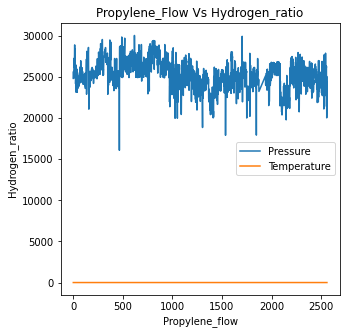

In [30]:
plt.figure(figsize=(5,5))

# First subplot
#plt.subplot(1, 2, 1)
plt.title('Propylene_Flow Vs Hydrogen_ratio')
plt.plot( df['Propylene_flow'], label='Pressure')
plt.plot( df['Hydrogen_ratio'], label='Temperature')
plt.xlabel('Propylene_flow')
plt.ylabel('Hydrogen_ratio')
plt.legend(loc='best')


Looking at these two graphs it's easier to conclude that niether a single variable is effecting target variable nor the variables have any kind of relationship between them. All of them combined help to get the value of the target dependent variable.

### Outliers in the data



Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Consequently, excluding outliers can cause our results to become statistically significant.


We are standardising the outliers using RobustScaler.

The above plot shows that most of the valuesof hydrogen flow lie between 0.07 to 0.25 which can be an indicator of the fact that during the process this should be the ideal value for hydrogen flow. L

One thing to notice from the above is that while the hydrogen flow of the sample points is almost identical, the MFR value decreases drastically as the value of Liquefied_Recycle_gas decreases.

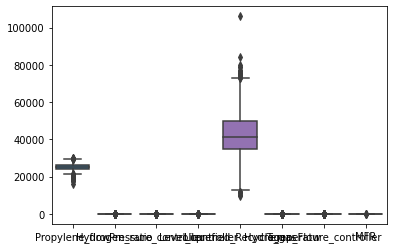

In [0]:
#using boxplot to look for outliers
sns.boxplot(data=df)

There are some outliers in the data which can either be removed or scaled in order to get a better accuracy of the model. Since there are about 190 outliers in total, instead of removing them first we are using RobustScaler so that the outliers do not affect our data as much and we do not lose the data as well.

# Independent and Dependent Variables and Splitting the data into train and test

In [0]:
#Dividing the data into independent and dependent variables
X= df.iloc[:,1:8].values
y= df.iloc[:,-1].values

In [12]:
print(X.shape)
print(y.shape)

(2484, 7)
(2484,)


In [0]:
#Splitting the data into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()
ro.fit(X_train)
X_train = ro.transform(X_train)
X_test = ro.transform(X_test)

In [0]:
""" # Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

' # Scale the data to be between -1 and 1\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

Making the model

In [0]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)


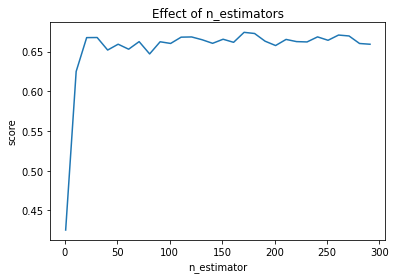

In [0]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(1, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
scores, estimators

([0.4253685341183704,
  0.6251256440265881,
  0.6677765400714694,
  0.6678966524593019,
  0.6521115568162659,
  0.6594596342995048,
  0.6531730745636587,
  0.6627091654836866,
  0.6472205965422342,
  0.6625436682638846,
  0.660419768167551,
  0.6683415866257197,
  0.6686219552579287,
  0.6650925125428813,
  0.6605782417684253,
  0.6657337874329654,
  0.6618421638399185,
  0.6744233345885564,
  0.672970492798945,
  0.6632778172173577,
  0.6577899869631089,
  0.6654943297221163,
  0.6627389614315801,
  0.6623274427701418,
  0.6686942857889784,
  0.6644110490361225,
  0.6710042335206542,
  0.6698525467455578,
  0.6603658620886663,
  0.6594267797610016],
 array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
        131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
        261, 271, 281, 291]))

In [28]:
#Picking one of the estimators
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0,max_features='sqrt',criterion='mse',n_jobs=-1)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [27]:
#Calculating then r2_score
from sklearn.metrics import r2_score, accuracy_score
print("The r2_score is: ",r2_score(y_test, y_pred))

The r2_score is:  0.669123530495207


The r2_score of our RVR model without the removal of any outliers is about 69.2%. Also there is no correlation between the features of the dataset and all the features contribute towards the dependent variable.



---
## KNN to impute missing values

We can try imputing the values using KNN imputer as well and see if that affects the r2 score of our model



In [0]:
dc = data.copy()
#importing KNN
from fancyimpute import KNN   

#Imputing missing values using KNN
X_filled_knn = KNN(k=3).fit_transform(dc[[ '513FC31103.pv', '513HC31114-5.mv', '513PC31201.pv',
       '513LC31202.pv', '513FC31409.pv', '513FC31114-5.pv', '513TC31220.pv']])

#dataframe
X_filled_knn = pd.DataFrame(X_filled_knn, columns = ['513FC31103.pv', '513HC31114-5.mv', '513PC31201.pv',
       '513LC31202.pv', '513FC31409.pv', '513FC31114-5.pv', '513TC31220.pv'])

#Splitting into dependent and dependent
X=X_filled_knn.iloc[:,0:7].values
y = dc.iloc[:,-1].values

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#model
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 100)
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)


from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred)

print("The Accuracy is: {}%".format(r2*100))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


Imputing row 1/2564 with 0 missing, elapsed time: 1.024
Imputing row 101/2564 with 0 missing, elapsed time: 1.025
Imputing row 201/2564 with 0 missing, elapsed time: 1.025
Imputing row 301/2564 with 0 missing, elapsed time: 1.026
Imputing row 401/2564 with 0 missing, elapsed time: 1.026
Imputing row 501/2564 with 0 missing, elapsed time: 1.026
Imputing row 601/2564 with 0 missing, elapsed time: 1.027
Imputing row 701/2564 with 0 missing, elapsed time: 1.027
Imputing row 801/2564 with 0 missing, elapsed time: 1.030
Imputing row 901/2564 with 0 missing, elapsed time: 1.030
Imputing row 1001/2564 with 0 missing, elapsed time: 1.030
Imputing row 1101/2564 with 0 missing, elapsed time: 1.031
Imputing row 1201/2564 with 0 missing, elapsed time: 1.031
Imputing row 1301/2564 with 0 missing, elapsed time: 1.031
Imputing row 1401/2564 with 0 missing, elapsed time: 1.032
Imputing row 1501/2564 with 0 missing, elapsed time: 1.032
Imputing row 1601/2564 with 0 missing, elapsed time: 1.032
Imputing 

By imputing the values using KNN imputer, the accuracy has spiked from 69.2% to 73%. This indicates that it's always not a good idea to delete the rows with missing values from the dataset. Also, with more data it is possible that the r2_score increases.

### Support Vector Machine

In [0]:
#Splitting the data into train test split
from sklearn.model_selection import train_test_split
X_train_r,X_test_r,y_train_r,y_test_r = train_test_split(X,y,test_size=0.1,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_r)
X_train_r = scaler.transform(X_train_r)
X_test_r = scaler.transform(X_test_r)


In [34]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_r,y_train_r)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_r = svr.predict(X_test_r)

In [36]:
svr.score(X_test_r,y_test_r)

0.6504463347850458

The accuracy of the model dangles between 65 to 73, with more data points we might get more too.